**Name** : Bodhisatya Ghosh \
**Class** : CSE DS \
**UID** : 2021700026 \
**Subject** : ML \
**Experiment number** : 10

<b>Problem statement</b>: Currency Exchange Rate Prediction with Long Short-Term Memory

In [45]:
import requests
import json
import pandas as pd
import numpy as np

### Loading Data

In [46]:
base = "https://api.frankfurter.app/1999-01-01..?amount=1&from="
conv_from = 'USD'
conv_to = 'INR'

In [47]:
api = '{}{}&to={}'.format(base,conv_from,conv_to)
res = requests.get(api)
json_data = json.loads(res.text)

In [48]:
rate_history = []
for rate in json_data['rates']:
    rate_history.append(json_data['rates'][rate]['INR'])
rate_history = np.array(rate_history)

### Preparing data

#### Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [50]:
rate_history_scaled = scale.fit_transform(rate_history.reshape(-1,1))
rate_history_scaled = rate_history_scaled[:,0]

#### Create dataset split

In [51]:
num_prev_days = 30

In [52]:
def create_seq_data(data, num_days):
    x = []
    y = []

    for i in range(0,len(data)-num_days-1):
        x.append(data[i:i+num_days])
        y.append(data[i+num_days])

    return np.array(x), np.array(y)

In [53]:
train_size = int(0.8 * len(rate_history_scaled))
train_data = rate_history_scaled[:train_size]
test_data = rate_history_scaled[train_size:]

In [54]:
xtrain, ytrain = create_seq_data(train_data,num_prev_days)
xtest, ytest = create_seq_data(test_data,num_prev_days)

### Create model and train model

In [55]:
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential

In [56]:
epochs = 20

In [57]:
lstm_model = Sequential()
lstm_model.add(LSTM(100,input_shape = (xtrain.shape[1],1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam',loss='mean_squared_error')
lstm_model.fit(xtrain,ytrain,epochs=epochs)

Epoch 1/20
20/20 [==============================] - 3s 7ms/step - loss: 0.0352
Epoch 2/20
20/20 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 3/20
20/20 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 4/20
20/20 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 5/20
20/20 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 6/20
20/20 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 7/20
20/20 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 8/20
20/20 [==============================] - 0s 7ms/step - loss: 9.8682e-04
Epoch 9/20
20/20 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 10/20
20/20 [==============================] - 0s 9ms/step - loss: 0.0010
Epoch 11/20
20/20 [==============================] - 0s 8ms/step - loss: 9.7467e-04
Epoch 12/20
20/20 [==============================] - 0s 8ms/step - loss: 9.5962e-04
Epoch 13/20
20/20 [==================

In [58]:
from statsmodels.regression.linear_model import OLS

In [59]:
ols_model = OLS(ytrain, xtrain).fit()

### Making predictions

In [60]:
ytest = scale.inverse_transform(ytest.reshape(-1,1))

In [61]:
lstm_pred = scale.inverse_transform(lstm_model.predict(xtest).reshape(-1,1))
ols_pred = scale.inverse_transform(ols_model.predict(xtest).reshape(-1,1))

5/5 [==============================] - 0s 3ms/step


### Evaluate predictions

In [62]:
from commonFunctions import *

#### Using Deep learning (LSTM)

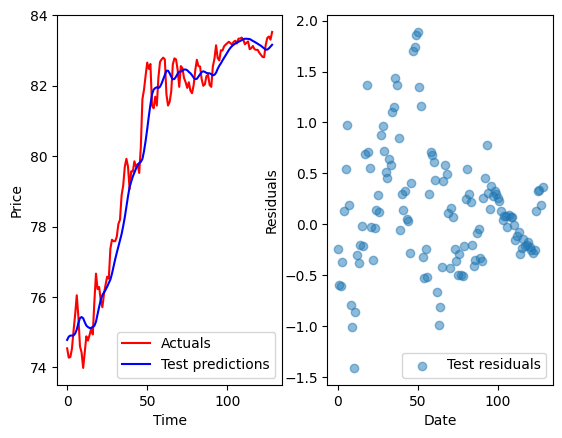

In [63]:
time_series_report(ytest, lstm_pred)

R2 score is: 0.960150243646289
MSE is: 0.37042060378221586


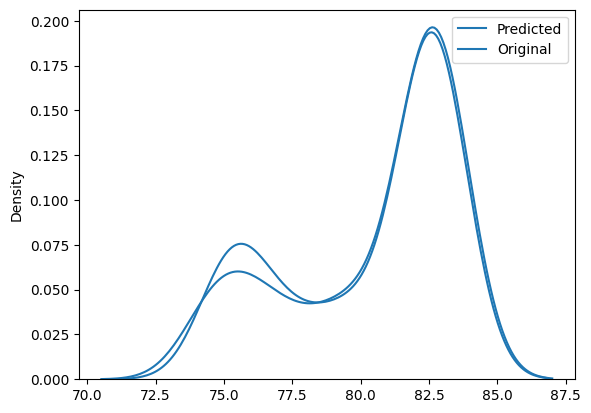

In [64]:
regression_report(ytest,lstm_pred)

#### Using Ordinary Least Square regression

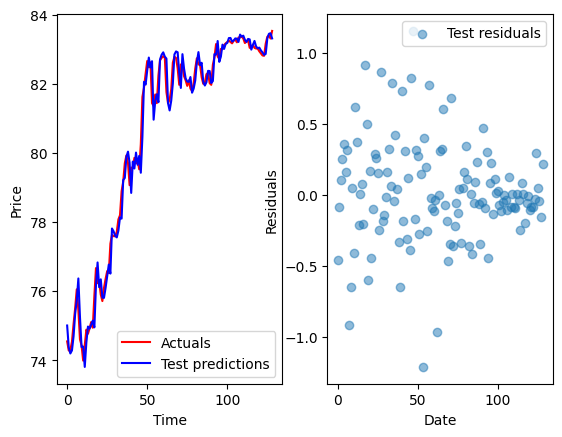

In [65]:
time_series_report(ytest, ols_pred)

R2 score is: 0.9860722460220314
MSE is: 0.12946445624551126


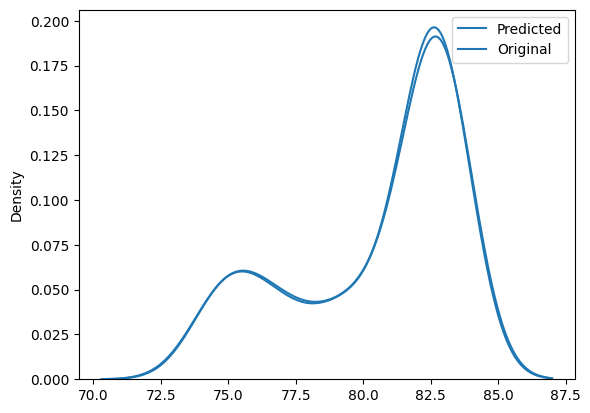

In [66]:
regression_report(ytest,ols_pred)

### Conclusion:

Both LSTM and OLS based models give accurate predictions, however, deeep learning based model gives a more generalized model with a test accuracy of 96.01%.
This project can be used to predict Future currency exchange rates and analyse PPP of other contries.